# Homework Week 8

For each of the following questions please show that the statistical assumptions for each of the respective tests are met. It is good practice always before start using statistical analysis to do descriptive statistics to understand you data. It is not required to show descriptive analysis here unless there is something important to report (transformations, deviation from normality, outliers, etc).

1. The data in the table give the infant mortality rates per 1000 livebirths in the United States for the period 1960-2000


![title](HW1.png)

a. Fit a linear regression line relating infant mortality rate to chronological year using these data. Use a data transformation if necessary

b. Test for significance of the linear relationship

c. If the present trend continues for the next 5 years what would be the predicted infant mortality rate in 2010


[1] "a"

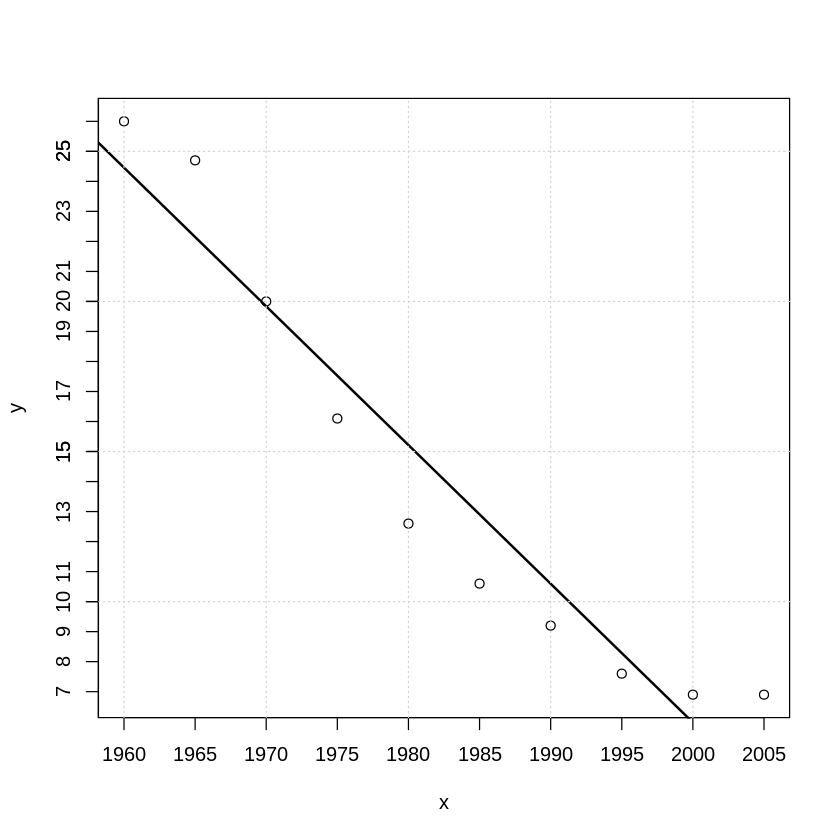

In [2]:
#from the table above, we have the data from 1960 to 2005 of infant motality per 1000 livebirths:
'a'
#we have x values:
x<-c(1960,1965,1970,1975,1980,1985,1990,1995,2000,2005)
#and y values:
y<-c(26.0,24.7,20.0,16.1,12.6,10.6,9.2,7.6,6.9,6.9)

#we can draw a linear regression:
relation <- lm(y ~ x)
plot(x, y, xaxt="n")
axis(side=1, at = seq(1960, 2005, by = 5))
axis(side=2, at= seq(0,30,1))
abline(relation, lwd=2)
grid(nx = NULL,ny = NULL)

In [3]:
'b'
coef(relation)
summary(relation)

[1] "b"

(Intercept)           x 
930.0951515  -0.4620606


Call:
lm(formula = y ~ x)

Residuals:
   Min     1Q Median     3Q    Max 
-2.615 -1.418 -0.260  1.389  3.236 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 930.09515   93.70477   9.926 8.97e-06 ***
x            -0.46206    0.04726  -9.776 1.00e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.147 on 8 degrees of freedom
Multiple R-squared:  0.9228,	Adjusted R-squared:  0.9131 
F-statistic: 95.57 on 1 and 8 DF,  p-value: 1.005e-05


In [4]:
'c'
a<-data.frame(x=2010)
predict(relation,a)

[1] "c"

1 
1.353333

$2.$ The file HackerRank-Developer-Survey-2018-Numeric.csv shows an extensive survey obtained in 2016 to 25000 Hackers. The survey asked developers many questions around their skills, educational background, current role, and more... Answer the following questions using the data from this file. The file HackerRank-Developer-Survey-2018-Numeric-Mapping.csv has the metadata that explains the coding on each variable. 
This data was obtained from Kaggle at [https://www.kaggle.com/hackerrank/developer-survey-2018](https://www.kaggle.com/hackerrank/developer-survey-2018) There is more information regarding the survey and the data itself at the website.

a. Is there a relationship between gender and the Age that the hacker begin coding(q1AgeBeginCoding)? (Use a logistic regression)

b. Does age to begin coding, and gender have an effect on job level (q8JobLevel)? (Use MLR)

c. There is an increase focus on understanding trends about women pursuing careers as developers are there any relationships in the data that could be useful advice to women that want to pursue a career as a developer? The zip file has many other variables that you can use for this analysis. 

In [67]:
#hacker <- unzip('developer-survey-2018.zip')
dnumber <- read.csv(file = "HackerRank-Developer-Survey-2018-Numeric.csv",
                      header = TRUE, #na.strings = '#NULL!',
                      dec = ",")
#dnumber[dnumber =='#NULL!'] <- NA
#dnumber <- na.omit(dnumber)
#dnumber <- dnumber[complete.cases(dnumber),]
#dnumber

In [79]:
'a. Is there a relationship between gender and the Age that the hacker begin coding(q1AgeBeginCoding)? (Use a logistic regression)'
agegender <- dnumber[,c("q1AgeBeginCoding","q2Age","q3Gender")]
agegender <- na.omit(agegender)


[1] "a. Is there a relationship between gender and the Age that the hacker begin coding(q1AgeBeginCoding)? (Use a logistic regression)"

In [72]:
genderage <- glm(q1AgeBeginCoding ~ q2Age + q3Gender, data = agegender, family = 'binomial')
summary(genderage)
'the summary showed that only age3,4,5 and gender 1,2 had impact to age begin coding'

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


Call:
glm(formula = q1AgeBeginCoding ~ q2Age + q3Gender, family = "binomial", 
    data = agegender)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.0133   0.0252   0.0367   0.0367   1.4820  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)   
(Intercept)    -0.6925     0.9802  -0.707  0.47984   
q2Age1         17.8746 15928.0025   0.001  0.99910   
q2Age2         18.4645  2846.1712   0.006  0.99482   
q2Age3          4.1319     1.4462   2.857  0.00428 **
q2Age4          4.8828     1.6553   2.950  0.00318 **
q2Age5          3.5379     1.5739   2.248  0.02458 * 
q2Age6         18.4254  2824.8748   0.007  0.99480   
q2Age7         18.4189  5844.6067   0.003  0.99749   
q2Age8         18.3959 11048.8230   0.002  0.99867   
q2Age9         18.6577 29232.4377   0.001  0.99949   
q3Gender1       3.8627     1.3935   2.772  0.00557 **
q3Gender2       3.6009     1.6732   2.152  0.03139 * 
q3Gender3      17.6587  5845.0874   0.003  0.99759   
---
Signif. c

[1] "the summary showed that only age3,4,5 and gender 1,2 had impact to age begin coding"

In [52]:
library(MASS)

In [77]:
m <- polr(q1AgeBeginCoding ~ q2Age + q3Gender, data = agegender, Hess = TRUE)
summary(m)


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

Call:
polr(formula = q1AgeBeginCoding ~ q2Age + q3Gender, data = agegender, 
    Hess = TRUE)

Coefficients:
              Value Std. Error   t value
q2Age1    -3.298443     1.4191 -2.324272
q2Age2    -0.679258     0.6738 -1.008161
q2Age3     0.110917     0.6500  0.170629
q2Age4     0.809363     0.6505  1.244183
q2Age5     0.119437     0.6550  0.182340
q2Age6    -0.002789     0.6843 -0.004076
q2Age7     1.171239     0.7692  1.522688
q2Age8     0.181682     1.0095  0.179967
q2Age9    -2.410843     1.7525 -1.375645
q3Gender1  0.602012     0.6166  0.976409
q3Gender2  0.981990     0.6186  1.587418
q3Gender3  0.889740     0.7418  1.199360

Intercepts:
         Value   Std. Error t value
#NULL!|1 -5.9563  0.9088    -6.5539
1|2      -2.4865  0.8402    -2.9592
2|3      -0.3213  0.8380    -0.3834
3|4       2.5973  0.8383     3.0982
4|5       4.7305  0.8409     5.6254
5|6       6.1698  0.8501     7.2580
6|7       7.2959  0.8746     8.3423
7|8       8.1256  0.9195     8.8371
8|9      10.0722  1.3

ERROR: Error in xy.coords(x, y, xlabel, ylabel, log): 'x' is a list, but does not have components 'x' and 'y'


[1] "b. Does age to begin coding, and gender have an effect on job level (q8JobLevel)? (Use MLR)"

(Intercept) q1AgeBeginCoding1 q1AgeBeginCoding2 q1AgeBeginCoding3 
        3.9751637         1.6960466         0.7346152         0.3872942 
q1AgeBeginCoding4 q1AgeBeginCoding5 q1AgeBeginCoding6 q1AgeBeginCoding7 
        1.2766537         1.1792277         0.6526791         0.4603932 
q1AgeBeginCoding8 q1AgeBeginCoding9         q3Gender1         q3Gender2 
        1.6930126         0.2325842        -1.2077479        -1.9703181 
        q3Gender3 
       -1.5687072


Call:
lm(formula = q8JobLevel ~ q1AgeBeginCoding + q3Gender, data = jobagegender)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.4635 -2.1547  0.5365  1.6079  7.6079 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)         3.9752     0.8154   4.875 1.11e-06 ***
q1AgeBeginCoding1   1.6960     0.7737   2.192 0.028405 *  
q1AgeBeginCoding2   0.7346     0.7646   0.961 0.336687    
q1AgeBeginCoding3   0.3873     0.7630   0.508 0.611736    
q1AgeBeginCoding4   1.2767     0.7647   1.669 0.095079 .  
q1AgeBeginCoding5   1.1792     0.7808   1.510 0.131005    
q1AgeBeginCoding6   0.6527     0.8434   0.774 0.439032    
q1AgeBeginCoding7   0.4604     1.0283   0.448 0.654351    
q1AgeBeginCoding8   1.6930     1.1379   1.488 0.136822    
q1AgeBeginCoding9   0.2326     2.2046   0.105 0.915983    
q3Gender1          -1.2077     0.5770  -2.093 0.036382 *  
q3Gender2          -1.9703     0.5794  -3.401 0.000675 ***
q3Gender3          -1.5687     0.7148  -2

Warning message:
“not plotting observations with leverage one:
  1325”

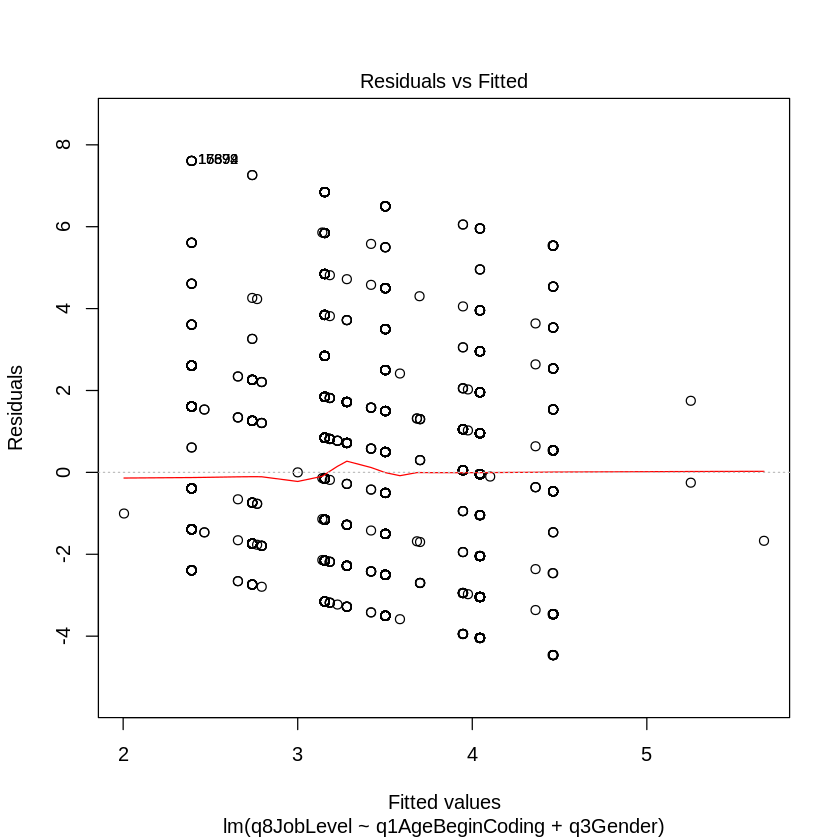

Warning message:
“not plotting observations with leverage one:
  1325”

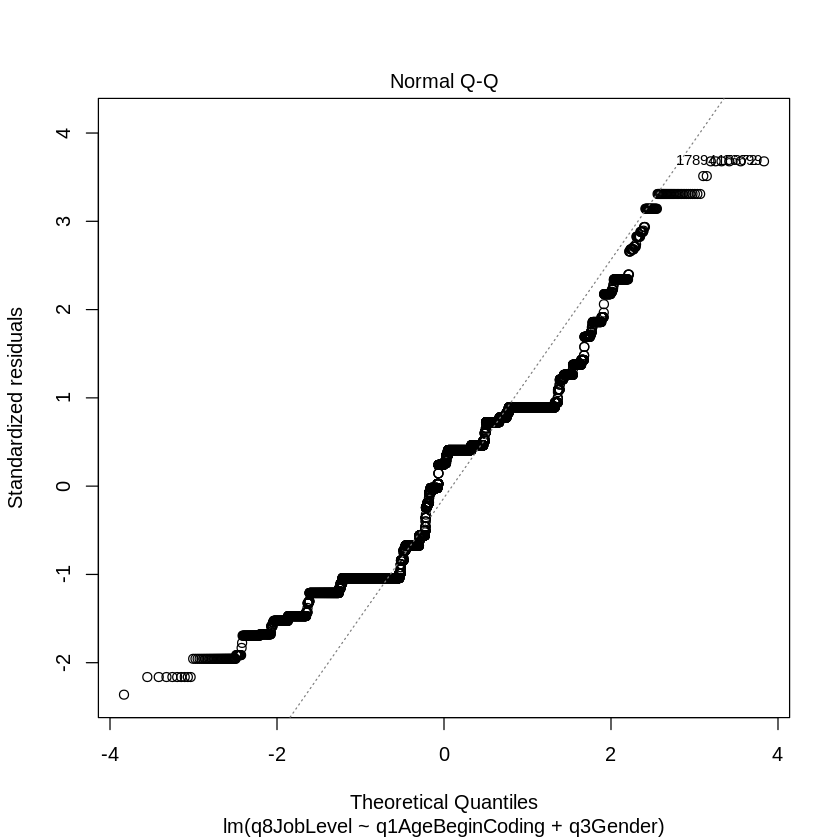

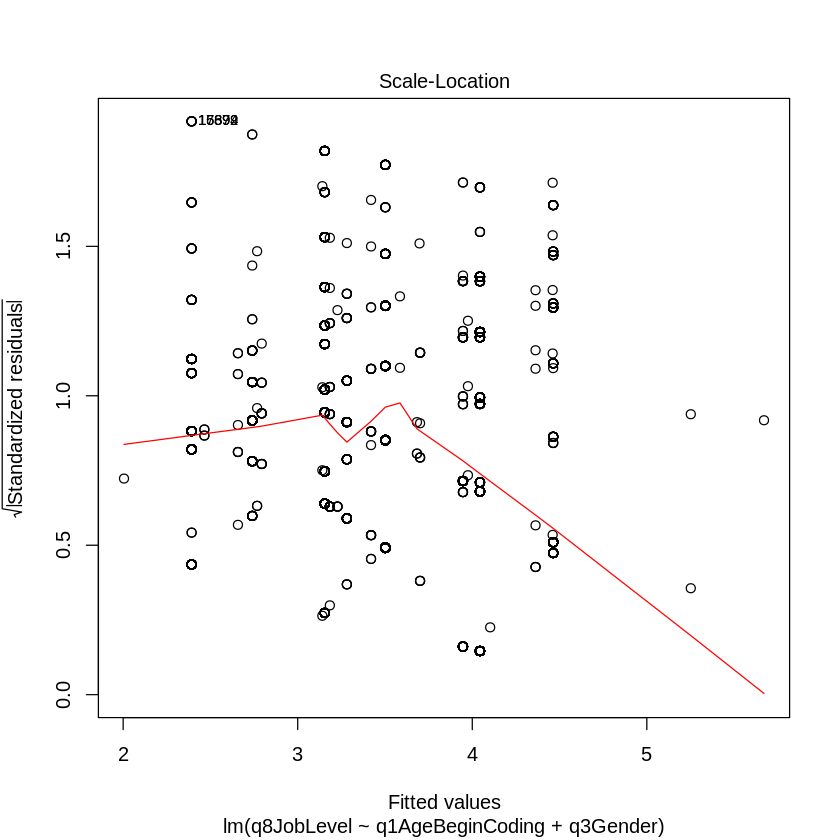

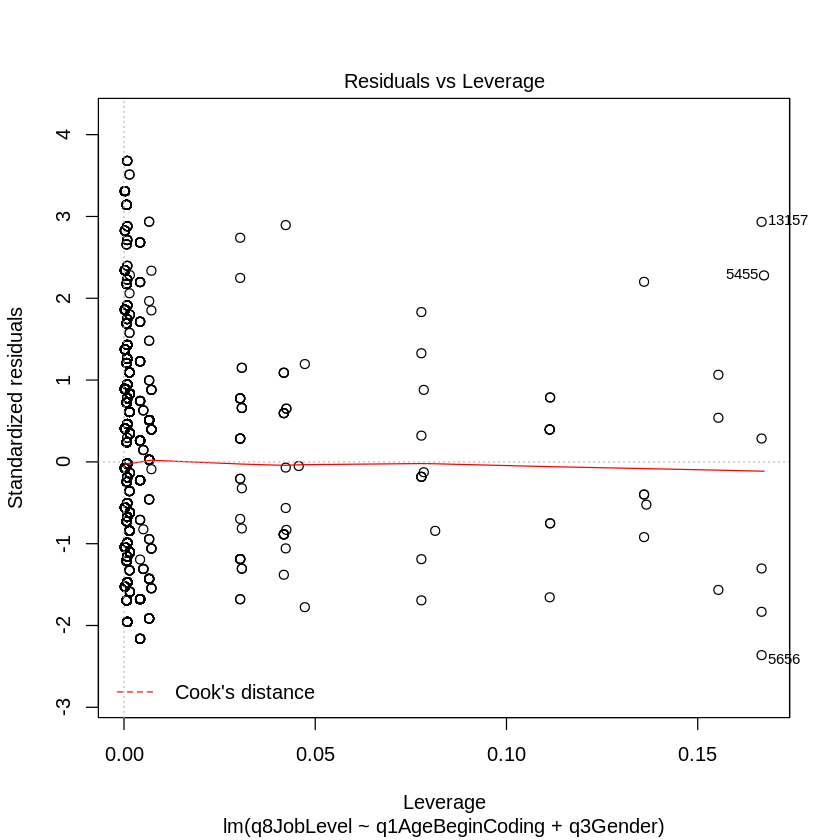

In [76]:
'b. Does age to begin coding, and gender have an effect on job level (q8JobLevel)? (Use MLR)'
jobagegender <- dnumber[,c("q1AgeBeginCoding","q3Gender","q8JobLevel")]
# Create the relationship model.
model <- lm(q8JobLevel~q1AgeBeginCoding+q3Gender, data = jobagegender)

coef(model)
summary(model)
#rsquared(model)
plot(model)


$3.$ The data set below represents the expected recovery time (in weeks) for patients after a surgical procedure with different post-operational methods for recovery. Negative values represent a faster recovery time than expected. The control patients followed a rutine post-operational for this type of procedure.

Using the data set below compare the effect of three treatments on the expected time of recovery after surgery. (Use ANOVA)

In [11]:
Recovery = c(.53, .36, .20, -.37, -.60, -.64, -.68, -1.27, .73, .31, .03, -.29, -.56, -.96, -1.61,
         -.78, -.86, -1.35, -1.48, -1.52, -2.04, -2.83)
treatment = c(rep("control",8), rep("surgery",7), rep("acupunture",7))
data = data.frame(Recovery, treatment)
levels(data$treatment)

[1] "acupunture" "control"    "surgery"

In [12]:
data$treatment <- ordered(data$treatment,
                         levels = c("acupunture", "control", "surgery"))

In [14]:
library(dplyr)
group_by(data, treatment) %>%
  summarise(
    count = n(),
    mean = mean(Recovery, na.rm = TRUE),
    sd = sd(Recovery, na.rm = TRUE)
  )


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



treatment,count,mean,sd
acupunture,7,-1.5514286,0.7063151
control,8,-0.3087500,0.6175629
surgery,7,-0.3357143,0.7908193


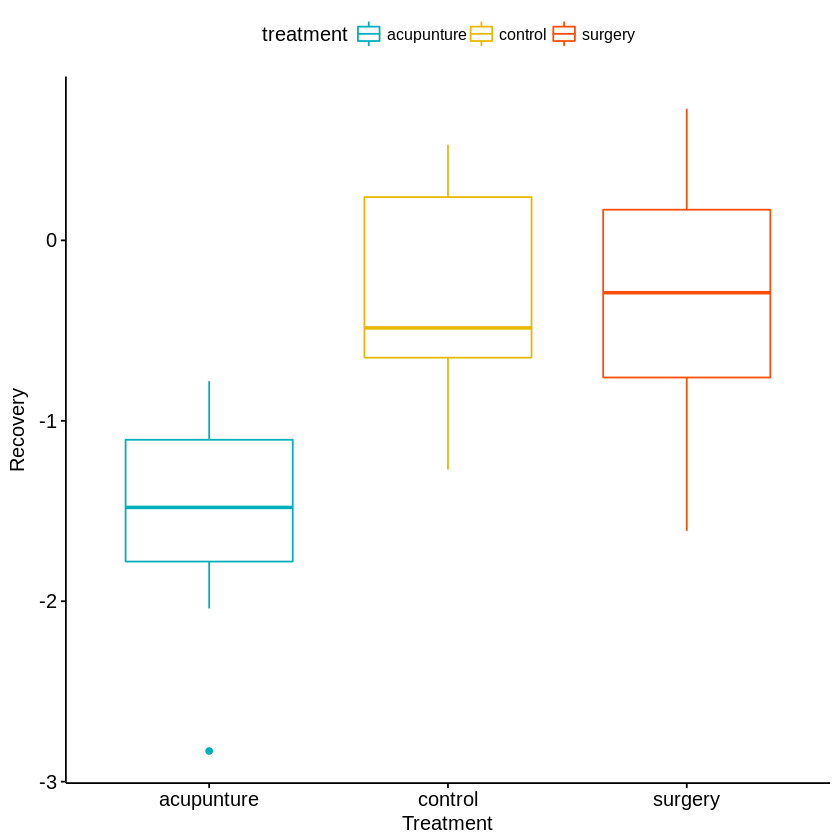

In [16]:
#install.packages("ggpubr")
# Box plots
# ++++++++++++++++++++
# Plot weight by group and color by group
library("ggpubr")
ggboxplot(data, x = "treatment", y = "Recovery", 
          color = "treatment", palette = c("#00AFBB", "#E7B800", "#FC4E07"),
          order = c("acupunture", "control", "surgery"),
          ylab = "Recovery", xlab = "Treatment")

In [59]:
res.aov <-aov(Recovery ~ treatment, data = data)
summary(res.aov)

            Df Sum Sq Mean Sq F value  Pr(>F)   
treatment    2  7.224   3.612   7.289 0.00447 **
Residuals   19  9.415   0.496                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [60]:
TukeyHSD(res.aov)
"this showed there are significant between accupuncture compared with control and surgery"

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Recovery ~ treatment, data = data)

$treatment
                          diff        lwr       upr     p adj
control-acupunture  1.24267857  0.3171207 2.1682364 0.0078656
surgery-acupunture  1.21571429  0.2598022 2.1716263 0.0116776
surgery-control    -0.02696429 -0.9525222 0.8985936 0.9969851


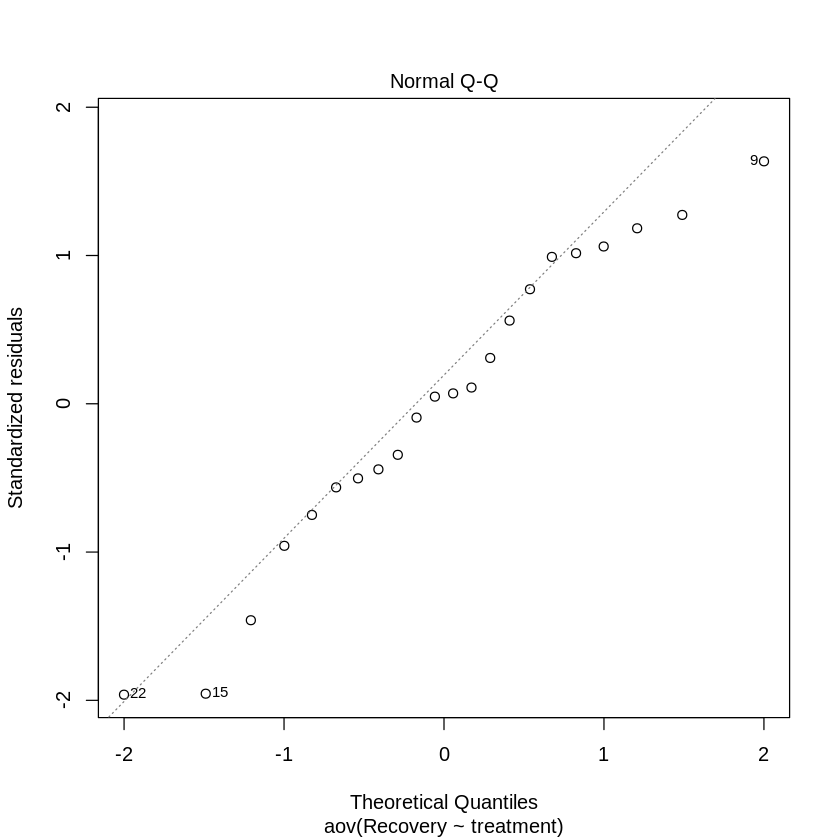

In [62]:
plot(res.aov, 2)